In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

In [3]:


def gaussian_smoothing(input_img):
                                
    gaussian_filter=np.array([[0.109,0.111,0.109],
                              [0.111,0.135,0.111],
                              [0.109,0.111,0.109]])
                                
    return cv2.filter2D(input_img,-1,gaussian_filter)  
        
def canny_edge_detection(input):
    
    input = input.astype('uint8')

    # Using OTSU thresholding - bimodal image
    otsu_threshold_val, ret_matrix = cv2.threshold(input,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    #lower_threshold = otsu_threshold_val * 0.8
    #upper_threshold = otsu_threshold_val * 1.7
    
    lower_threshold = otsu_threshold_val * 0.4
    upper_threshold = otsu_threshold_val * 1.3
    
    #print(lower_threshold,upper_threshold)
    
    #print(lower_threshold,upper_threshold)
    edges = cv2.Canny(input, lower_threshold, upper_threshold)
    return edges
    
def HoughCircles(input,circles): 
    rows = input.shape[0] 
    cols = input.shape[1] 
    
    # initializing the angles to be computed 
    sinang = dict() 
    cosang = dict() 
    
    # initializing the angles  
    for angle in range(0,360): 
        sinang[angle] = np.sin(angle * np.pi/180) 
        cosang[angle] = np.cos(angle * np.pi/180) 
            
    # initializing the different radius
    # For Given Test Image <----------------------PLEASE SEE BEFORE RUNNING------------------------------->
    radius = [i for i in range(10,70)]
    # For Generic Images
    #length=int(rows/2)
    #radius = [i for i in range(5,length)]

       
    # Initial threshold value 
    threshold = 190 
    
    for r in radius:
        #Initializing an empty 2D array with zeroes 
        acc_cells = np.full((rows,cols),fill_value=0,dtype=np.uint64)
         
        # Iterating through the original image 
        for x in range(rows): 
            for y in range(cols): 
                if input[x][y] == 255:# edge 
                    # increment in the accumulator cells 
                    for angle in range(0,360): 
                        b = y - round(r * sinang[angle]) 
                        a = x - round(r * cosang[angle]) 
                        if a >= 0 and a < rows and b >= 0 and b < cols: 
                            acc_cells[a][b] += 1
                             
       # print('For radius: ',r)
        acc_cell_max = np.amax(acc_cells)
        #print('max acc value: ',acc_cell_max)
        
        if(acc_cell_max > 150):  

            print("Detecting the circles for radius: ",r)       
            
            # Initial threshold
            acc_cells[acc_cells < 150] = 0  
               
            # find the circles for this radius 
            for i in range(rows): 
                for j in range(cols): 
                    if(i > 0 and j > 0 and i < rows-1 and j < cols-1 and acc_cells[i][j] >= 150):
                        avg_sum = np.float32((acc_cells[i][j]+acc_cells[i-1][j]+acc_cells[i+1][j]+acc_cells[i][j-1]+acc_cells[i][j+1]+acc_cells[i-1][j-1]+acc_cells[i-1][j+1]+acc_cells[i+1][j-1]+acc_cells[i+1][j+1])/9) 
                        #print("Intermediate avg_sum: ",avg_sum)
                        if(avg_sum >= 33):
                            #print("For radius: ",r,"average: ",avg_sum,"\n")
                            circles.append((i,j,r))
                            acc_cells[i:i+5,j:j+7] = 0
                 

def main():
    
    img_path = 'disks.png'
    #sample_inp1_path = 'circle_sample_1.jpg'
    
    orig_img = cv2.imread(img_path)
    
    # Reading the input image and converting to gray scale
    input = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    
    # Create copy of the orignial image
    input_img = deepcopy(input)
    
    #Steps
    #1. Denoise using Gaussian filter and detect edges using canny edge detector
    smoothed_img = gaussian_smoothing(input_img)
    
    #2. Detect Edges using Canny Edge Detector
    edged_image = canny_edge_detection(smoothed_img)
    #3. Detect Circle radius
    #4. Perform Circle Hough Transform
    circles = []
    
    # cv2.imshow('Circle Detected Image',edged_image)
   
    # Detect Circle 
    HoughCircles(edged_image,circles)  
    
    # Print the output
    for vertex in circles:
        cv2.circle(orig_img,(vertex[1],vertex[0]),vertex[2],(0,255,0),1)
        cv2.rectangle(orig_img,(vertex[1]-2,vertex[0]-2),(vertex[1]-2,vertex[0]-2),(0,0,255),3)
        
    #print(circles)
        
    plt.imshow(orig_img)

if __name__ == '__main__':
    main()

Detecting the circles for radius:  31
Detecting the circles for radius:  32
Detecting the circles for radius:  33


**Using Hough circle built in method**

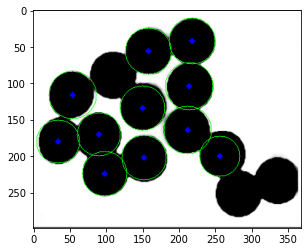

In [5]:
import numpy as np
import cv2 as cv
img = cv.imread('disks.png',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),1)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',cimg)
plt.imshow(cimg)
cv2.imwrite("detected_c.png",cimg)
# cv.waitKey(0)
cv.destroyAllWindows()